In [32]:
#Lab 6
#NAive Bayseian

import numpy as np
import pandas as pd

df = pd.read_csv("id3.csv")
df.head()

from sklearn.model_selection import train_test_split

X = df[['Outlook', 'Temperature']]
y = df['Play Tennis']
from sklearn import preprocessing

print(X)

from sklearn.preprocessing import LabelEncoder

X1 = X.apply(LabelEncoder().fit_transform)
print(X1)
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(y)
print(y1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)

from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
from sklearn import metrics

predictions = naive_model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['yes', 'no'], columns=['yes ', 'no'])
print(df)
print(metrics.accuracy_score(y_test, predictions)) 

     Outlook Temperature
0      Sunny         Hot
1      Sunny         Hot
2   Overcast         Hot
3       Rain        Mild
4       Rain        Cool
5       Rain        Cool
6   Overcast        Cool
7      Sunny        Mild
8      Sunny        Cool
9       Rain        Mild
10     Sunny        Mild
11  Overcast        Mild
12  Overcast         Hot
13      Rain        Mild
    Outlook  Temperature
0         2            1
1         2            1
2         0            1
3         1            2
4         1            0
5         1            0
6         0            0
7         2            2
8         2            0
9         1            2
10        2            2
11        0            2
12        0            1
13        1            2
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Training Data Shape: (9, 2)
Testing Data Shape: (5, 2)
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

 

In [38]:
#Lab 7
#Kmeans

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()
#print(iris)
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.33, random_state=42)
model=KMeans(n_clusters=3)
model.fit(x_train,y_train)
model.score
print('k-means:',metrics.accuracy_score(y_test,model.predict(x_test)))
from sklearn.mixture import GaussianMixture
model2=GaussianMixture(n_components=3)
model2.fit(x_train,y_train)
model2.score
print("EM algorithm:",metrics.accuracy_score(y_test,model2.predict(x_test)))

k-means: 0.24
EM algorithm: 0.32


In [34]:
#LAB 08
#KNN

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
iris=datasets.load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
model.score
metrics.accuracy_score(y_test,model.predict(x_test))
i=1
x=x_test[i]
x_new=np.array([x])
print("\n XNEW \n",x_new)
for i in range(len(x_test)):
    x=x_test[i]
    x_new=np.array([x])
    prediction=model.predict(x_new)
    print("\n Actual:{0}{1},predicted:{2}{3}".format(y_test[i],iris["target_names"][y_test[i]],prediction,iris["target_names"][prediction]))
    print("\n TEST SCORE[Accuracy]:{:.2f}\n".format(model.score(x_test,y_test)))


 XNEW 
 [[4.6 3.1 1.5 0.2]]

 Actual:0setosa,predicted:[0]['setosa']

 TEST SCORE[Accuracy]:1.00


 Actual:0setosa,predicted:[0]['setosa']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:2virginica,predicted:[2]['virginica']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:2virginica,predicted:[2]['virginica']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:1versicolor,predicted:[1]['versicolor']

 TEST SCORE[Accuracy]:1.00


 Actual:2virginica,predicted:[2]['virginica']

 TEST S

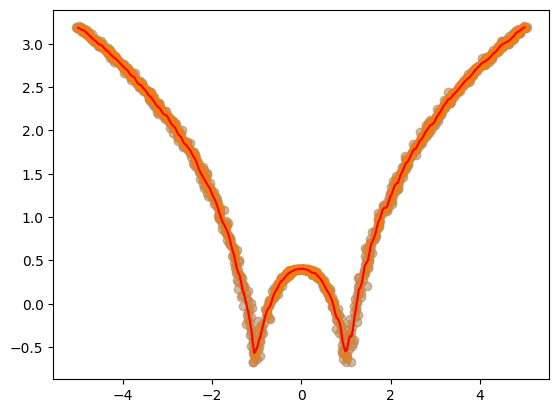

In [35]:
#LAB 9
#Regression algo

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000)#randomness to x 
plt.scatter(x, y, alpha=0.3)


def local_regression(x0, x, y, tau):
    x0 = np.r_[1, x0]#append bias terms 
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * radial_kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y #generalized inverse of a matrix using its singular-value decomposition (SVD) 
    return x0 @ beta


def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau ** 2))


def plot_lr(tau):
    domain = np.linspace(-5, 5, num=300)
    pred = [local_regression(x0, x, y, tau) for x0 in domain]
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red")
    return plt


plot_lr(0.03).show()

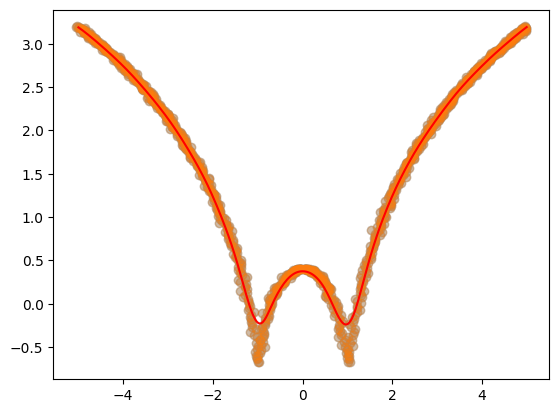

In [26]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000)
plt.scatter(x, y, alpha=0.3)
def local_regression(x0, x, y, tau):
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * radial_kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    return x0 @ beta

def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau * 2))
def plot_lr(tau):
    domain = np.linspace(-5, 5, num=300)
    pred = [local_regression(x0, x, y, tau) for x0 in domain]
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red")
    return plt

plot_lr(0.02).show()